#### Comparing realistic and isotropic fullsky CMB noise sims

In [1]:
import numpy as np, prjlib, plottools as pl, tools_lens, pickle, healpy as hp, curvedsky as cs, warnings
from matplotlib.pyplot import *
warnings.filterwarnings("ignore")

In [2]:
ntypes = ['base','base_iso','goal','goal_iso']
pobj = { ntype : prjlib.analysis_init(t='la',freq='com',ntype=ntype+'_roll50') for ntype in ntypes }
qobj = { ntype : tools_lens.init_qobj(pobj[ntype].stag,doreal=False,rlmin=300,rlmax=4096) for ntype in ntypes }

In [3]:
wn = prjlib.wfac('la')
lmax = 2048
q = 'TT'
l = np.linspace(0,lmax,lmax+1)

In [4]:
al = { ntype : (np.loadtxt(qobj[ntype].f[q].al)).T[1] for ntype in ntypes }
n0 = { ntype : (np.loadtxt(qobj[ntype].f[q].n0bs)).T[1] for ntype in ntypes }

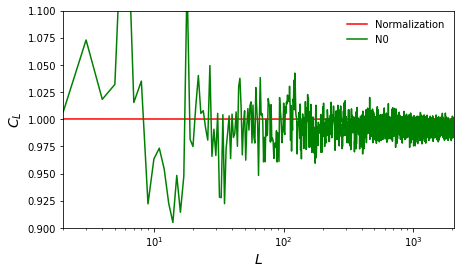

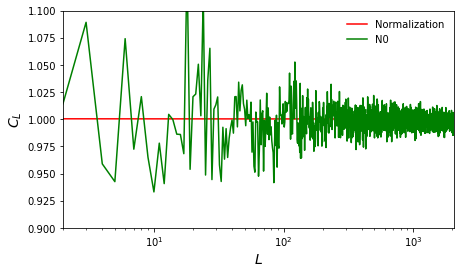

<Figure size 504x288 with 0 Axes>

In [5]:
for n in ['base','goal']:
    pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=2048,xlog=True,ymin=.9,ymax=1.1)
    plot(l,al[n]/al[n+'_iso'],'r',label='Normalization')
    plot(l,n0[n]/n0[n+'_iso'],'g',label='N0')
    legend()
    show()
    clf()